In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from newGraphDiscovery import GraphDiscoveryNew
import numpy as onp
import matplotlib.pyplot as plt
from tqdm import tqdm
import networkx as nx
from sklearn.preprocessing import StandardScaler

# Galton Family height dataset

This dataset explores the relationship between the heights of parents and their children. Its main conclusion was that height between parents and children are not corrolated, and so children of tall parents experience a return to the mean with a negative correlation between parents' height and their children. 

## First try : Without the family ID

In [3]:
df=pd.read_csv("Galton_processed.txt",sep='\t')
df_no_ID=df.drop('Family ID',axis=1)
node_names_no_ID=df_no_ID.columns
X_no_ID=df_no_ID.to_numpy()
X_no_ID=(X_no_ID-onp.mean(X_no_ID,axis=0))/onp.std(X_no_ID,axis=0)

In [4]:
df

,Family ID,Father Height,Mother Height,Gender,Height
0,1,78.5,67.0,0,73.2
1,1,78.5,67.0,1,69.2
2,1,78.5,67.0,1,69.0
3,1,78.5,67.0,1,69.0
4,2,75.5,66.5,0,73.5
...,...,...,...,...,...
885,203,62.0,66.0,0,64.0
886,203,62.0,66.0,1,62.0
887,203,62.0,66.0,1,61.0
888,204,62.5,63.0,0,66.5


In [5]:
beta=onp.array([0.1,0.01,0.001])
graph_discovery=GraphDiscoveryNew(X_no_ID.T,beta,onp.array(node_names_no_ID),l=1)

Computing kernel matrix


inspecting Father Height
linear kernel (using gamma=3.31e+01)
 n/(n+s)=0.95, Z=-20.21
decision : refused
quadratic kernel (using gamma=5.97e+00)
 n/(n+s)=0.97, Z=-18.70
decision : refused
gaussian kernel (using gamma=1.00e-09)
 n/(n+s)=0.99, Z=-1.43
decision : refused
Father Height has no ancestors (n/(s+n)=0.99)



inspecting Mother Height
linear kernel (using gamma=3.06e+01)
 n/(n+s)=0.97, Z=-19.07
decision : refused
quadratic kernel (using gamma=4.79e+00)
 n/(n+s)=0.98, Z=-15.34
decision : refused
gaussian kernel (using gamma=1.00e-09)
 n/(n+s)=0.99, Z=-1.27
decision : refused
Mother Height has no ancestors (n/(s+n)=0.99)



inspecting Gender
linear kernel (using gamma=5.63e+01)
 n/(n+s)=0.78, Z=-20.98
decision : refused
quadratic kernel (using gamma=1.51e+01)
 n/(n+s)=0.83, Z=-20.73
decision : refused
gaussian kernel (using gamma=1.00e-09)
 n/(n+s)=0.96, Z=0.32
decision : refused
Gender has no ancestors (n/(s+n)=0.96)



inspecting Height
linear kernel (using gamma=6.02e+01)
 n/(n+

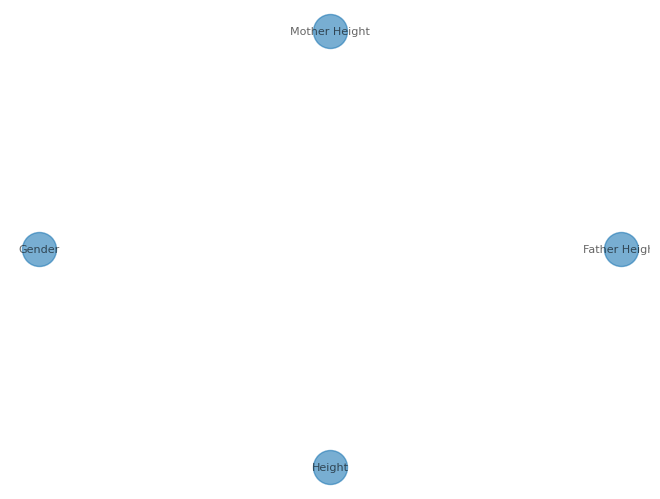

In [6]:
for node in graph_discovery.names:
    print(f'inspecting {node}')
    graph_discovery.find_ancestors(node,gamma='auto',kPCA='no')
    print('\n')
graph_discovery.plot_graph()

Here we see this conclusion that there is a complete independance of all the terms. Where this might be troubling is for gender, which should influence the height. Several ways to interpret this: 
- It's not a shortcoming. If one was to predict the height only using one's gender, this prediction would be very noisy and generally considered a poor regression.
- It's a shortcoming. 
  - Is the data sufficient (890 samples, I would say yes)
  - Is categorical data properly handled ? 
  - Did the auto-mode select a good $\gamma$ ? 

## Second try : With the family ID

Computing kernel matrix
inspecting Family ID
linear kernel (using gamma=3.34e+01)
 n/(n+s)=0.43, Z=-21.03
decision : refused
quadratic kernel (using gamma=5.65e+00)
 n/(n+s)=0.57, Z=-20.91
decision : refused
gaussian kernel (using gamma=1.00e-09)
 n/(n+s)=0.85, Z=-7.98
decision : accepted
Family ID has ancestors with gaussian kernel (n/(s+n)=0.85)
ancestors after pruning:  ['Father Height', 'Mother Height'] 



inspecting Father Height
linear kernel (using gamma=3.32e+01)
 n/(n+s)=0.44, Z=-21.03
decision : refused
quadratic kernel (using gamma=5.21e+00)
 n/(n+s)=0.60, Z=-20.90
decision : refused
gaussian kernel (using gamma=1.00e-09)
 n/(n+s)=0.86, Z=-6.87
decision : accepted
Father Height has ancestors with gaussian kernel (n/(s+n)=0.86)
ancestors after pruning:  ['Family ID'] 



inspecting Mother Height
linear kernel (using gamma=6.32e+00)
 n/(n+s)=0.95, Z=-20.50
decision : refused
quadratic kernel (using gamma=1.08e-01)
 n/(n+s)=0.99, Z=-14.34
decision : refused
gaussian kernel (us

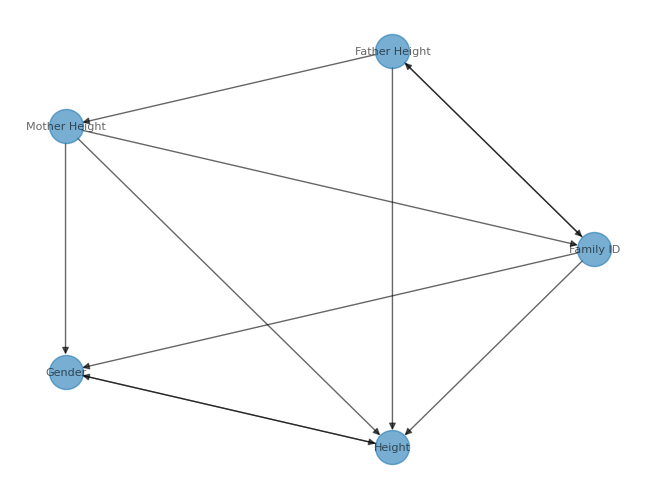

In [7]:
node_names=df.columns
X=df.to_numpy()
X=(X-onp.mean(X,axis=0))/onp.std(X,axis=0)
graph_discovery_2=GraphDiscoveryNew(X.T,beta,onp.array(node_names),l=1)
for node in graph_discovery_2.names:
    print(f'inspecting {node}')
    graph_discovery_2.find_ancestors(node,gamma='auto',kPCA='no')
    print('\n')
graph_discovery_2.plot_graph()

## Third try : Manual mode

Computing kernel matrix
inspecting X_0
linear kernel (using gamma=3.32e+01)
 n/(n+s)=0.44, Z=-21.03
linear kernel
 n/(n+s)=0.44, Z=-21.03
decision : accepted
X_0 has ancestors with linear kernel (n/(s+n)=0.44)
linear kernel
 n/(n+s)=0.44, Z=-21.04
linear kernel
 n/(n+s)=0.46, Z=-21.05
linear kernel
 n/(n+s)=0.45, Z=-21.07
ancestors after pruning:  ['X_3'] 



inspecting X_1
linear kernel (using gamma=6.32e+00)
 n/(n+s)=0.95, Z=-20.50
linear kernel
 n/(n+s)=0.95, Z=-20.50
decision : refused
quadratic kernel (using gamma=1.08e-01)
 n/(n+s)=0.99, Z=-14.34
quadratic kernel
 n/(n+s)=0.99, Z=-14.34
decision : refused
gaussian kernel (using gamma=1.00e-09)
 n/(n+s)=0.86, Z=-11.54
gaussian kernel
 n/(n+s)=0.86, Z=-11.54
decision : refused
X_1 has no ancestors (n/(s+n)=0.86)



inspecting X_2
linear kernel (using gamma=4.44e+00)
 n/(n+s)=0.93, Z=-20.83
linear kernel
 n/(n+s)=0.93, Z=-20.83
decision : refused
quadratic kernel (using gamma=1.15e-01)
 n/(n+s)=1.00, Z=-4.24
quadratic kernel
 n/(n+s

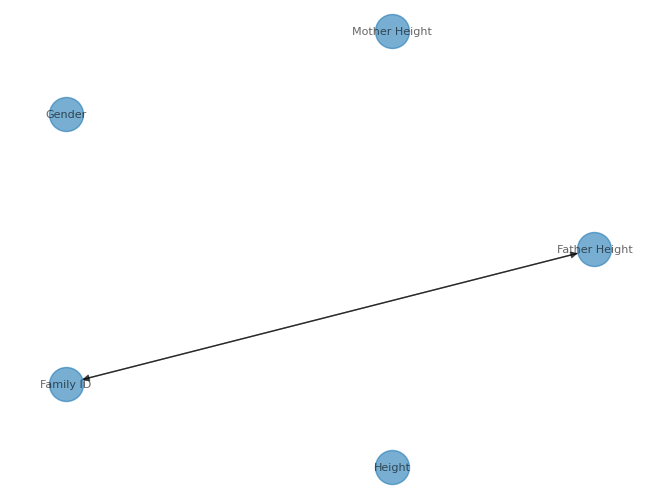

In [8]:
names=onp.array(df.columns)
onp.random.shuffle(names)
df_mystery=df[names]

X_shuffled=df_mystery.to_numpy()
X_shuffled=(X_shuffled-onp.mean(X_shuffled,axis=0))/onp.std(X_shuffled,axis=0)
graph_discovery_3=GraphDiscoveryNew(X_shuffled.T,beta,onp.array([f'X_{k}' for k in range(len(names))]),l=1)
for node in graph_discovery_3.names:
    print(f'inspecting {node}')
    graph_discovery_3.find_ancestors(node,gamma='auto',kPCA='no',acceptation_logic='manual')
    print('\n')
graph_discovery_3.G=nx.relabel_nodes(graph_discovery_3.G, {old:new for old,new in zip(graph_discovery_3.names,names)})
graph_discovery_3.plot_graph()